# Exploratory Data Analysis
Analysis of the Steam reviews dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Configuration
DATA_FILE = 'steam_new.json'

## Load Data
Load a sample of the data if memory issues persist 

In [2]:
print(f"Loading all rows from {DATA_FILE}...")

data = []
with open(DATA_FILE, 'r') as f:
    for i, line in enumerate(f):
        try:
            data.append(ast.literal_eval(line))
        except (ValueError, SyntaxError):
            continue

df = pd.DataFrame(data)
print(f"Loaded {len(df)} rows.")

Loading all rows from steam_new.json...
Loaded 7793069 rows.


## Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793069 entries, 0 to 7793068
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   username      object 
 1   hours         float64
 2   products      float64
 3   product_id    object 
 4   page_order    int64  
 5   date          object 
 6   text          object 
 7   early_access  bool   
 8   page          int64  
 9   found_funny   float64
 10  compensation  object 
 11  user_id       object 
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 661.5+ MB


## Summary Statistics

In [4]:
df.describe()

,hours,products,page_order,page,found_funny
count,7.766532e+06,7.778108e+06,7.793069e+06,7.793069e+06,1.200756e+06
mean,1.118365e+02,2.364839e+02,4.483445e+00,8.930331e+02,7.896183e+00
std,3.928604e+02,4.857889e+02,2.872802e+00,1.927711e+03,7.338724e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,4.000000e+00,4.500000e+01,2.000000e+00,5.200000e+01,1.000000e+00
50%,1.530000e+01,1.100000e+02,4.000000e+00,2.370000e+02,1.000000e+00
75%,5.970000e+01,2.460000e+02,7.000000e+00,8.290000e+02,3.000000e+00
max,4.210070e+04,1.818800e+04,9.000000e+00,1.837100e+04,1.331800e+04


## Missing Values

In [5]:
df.isnull().sum()

username              0
hours             26537
products          14961
product_id            0
page_order            0
date                  0
text                  0
early_access          0
page                  0
found_funny     6592313
compensation    7647446
user_id         4616846
dtype: int64

## Unique Counts

In [6]:
print(f"Unique Users: {df['username'].nunique()}")
print(f"Unique Products: {df['product_id'].nunique()}")

Unique Users: 2567538
Unique Products: 15474


## Review Character Count

In [7]:
# Find average character count per review
average_character_count = df['text'].str.len().mean()
print(f"Average character count per review: {average_character_count}")

# Find average sentence count per review
average_sentence_count = df['text'].str.split('.').str.len().mean()
print(f"Average sentence count per review: {average_sentence_count}")

Average character count per review: 337.1155397186911
Average sentence count per review: 5.02165398509881


## Hours Played Distribution

count    7.766532e+06
mean     1.118365e+02
std      3.928604e+02
min      0.000000e+00
25%      4.000000e+00
50%      1.530000e+01
75%      5.970000e+01
max      4.210070e+04
Name: hours, dtype: float64


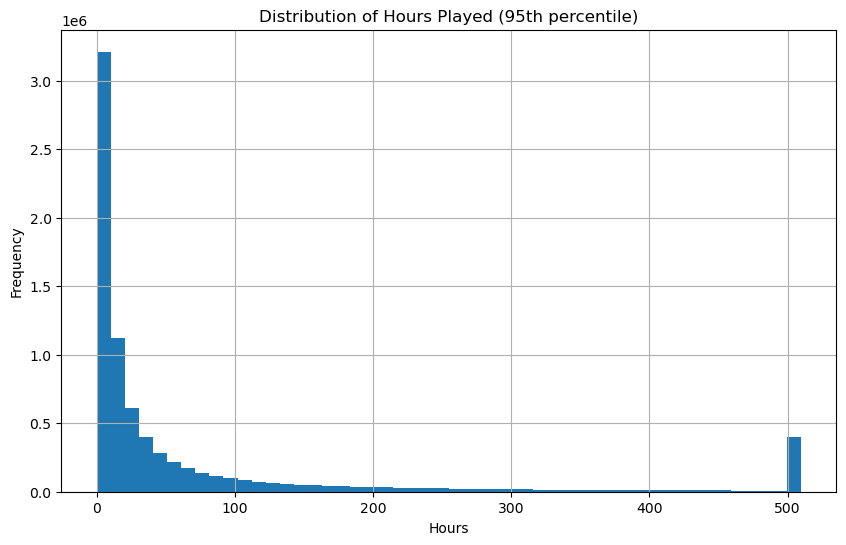

In [8]:
print(df['hours'].describe())

plt.figure(figsize=(10, 6))
df['hours'].clip(upper=df['hours'].quantile(0.95)).hist(bins=50)
plt.title('Distribution of Hours Played (95th percentile)')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

## Early Access Distribution

In [9]:
df['early_access'].value_counts(normalize=True)

early_access
False    0.862271
True     0.137729
Name: proportion, dtype: float64

## Review Length Analysis

count    7.793069e+06
mean     3.371155e+02
std      6.448182e+02
min      0.000000e+00
25%      4.200000e+01
50%      1.220000e+02
75%      3.480000e+02
max      1.179100e+04
Name: review_length, dtype: float64


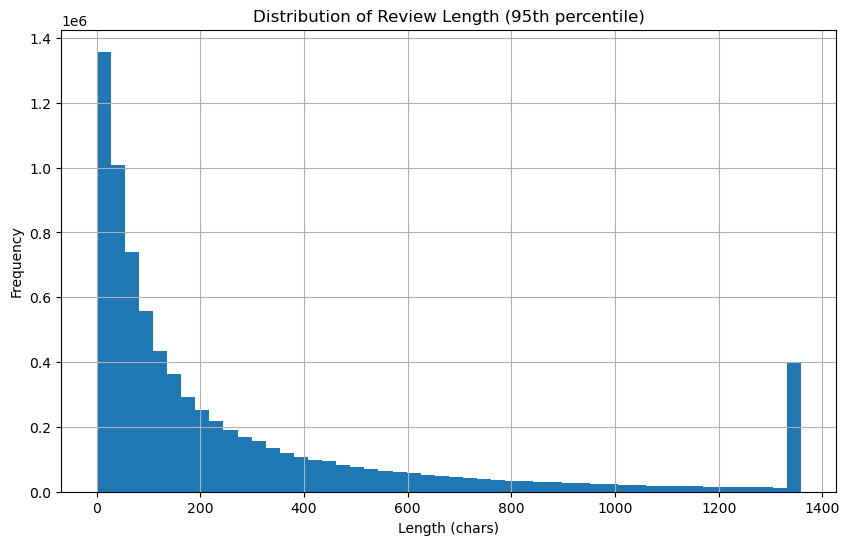

In [10]:
df['review_length'] = df['text'].astype(str).apply(len)
print(df['review_length'].describe())

plt.figure(figsize=(10, 6))
df['review_length'].clip(upper=df['review_length'].quantile(0.95)).hist(bins=50)
plt.title('Distribution of Review Length (95th percentile)')
plt.xlabel('Length (chars)')
plt.ylabel('Frequency')
plt.show()

## Reviews Over Time

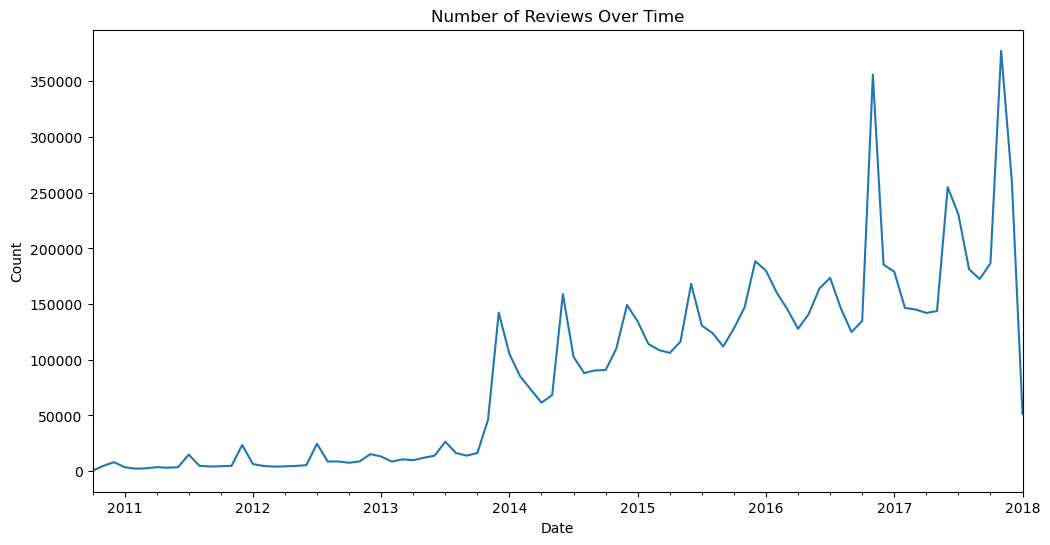

In [11]:
try:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    reviews_per_month = df.set_index('date').resample('ME').size()
    
    plt.figure(figsize=(12, 6))
    reviews_per_month.plot()
    plt.title('Number of Reviews Over Time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.show()
except Exception as e:
    print(f"Could not perform time analysis: {e}")